In [4]:
#Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

<BarContainer object of 5 artists>

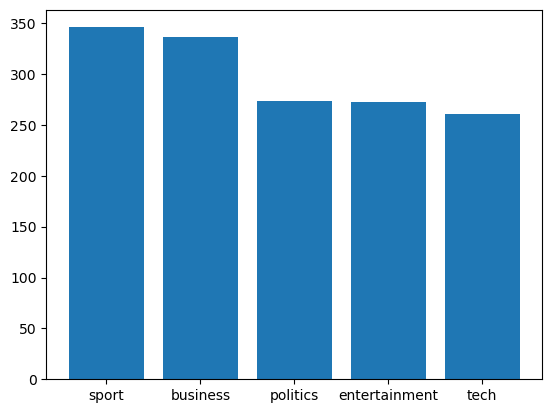

In [5]:
#Read the dataframe and check the data format
df_train=pd.read_csv(r"D:\ML\Unsupervised\Week4\BBC News Train.csv")
df_test=pd.read_csv(r"D:\ML\Unsupervised\Week4\BBC News Test.csv")
frequency=df_train['Category'].value_counts()
plt.bar(frequency.index, frequency.values)

In [37]:
#TF-IDF to convert the data to matrix
tfidf_vectorizer= TfidfVectorizer()
tfidf_matrix_train= tfidf_vectorizer.fit_transform(df_train['Text'])
df_tfidf_train = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_matrix_test=tfidf_vectorizer.fit_transform(df_test["Text"])
df_tfidf_test = pd.DataFrame(tfidf_matrix_test.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_matrix_train.shape

df_tfidf_train["Category"]=df_train["Category"].values
df_tfidf_train["ArticleId"]=df_train["ArticleId"].values
df_tfidf_train.head()

,00,000,0001,000bn,000m,000th,001,001and,001st,0051,...,zoom,zooms,zooropa,zorro,zuluaga,zurich,zutons,zvonareva,Category,ArticleId
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,business,1833
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,business,154
2,0.0,0.020274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,business,1101
3,0.0,0.017389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,tech,1976
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,business,917


In [72]:
#There are 5 categories, so we set the compoents to 5
n_components=5
nmf_model=NMF(n_components=n_components)
nmf_matrix=nmf_model.fit(tfidf_matrix_train)
H=nmf_model.components_  
W=nmf_model.fit_transform(tfidf_matrix_train)
predicted_topics_train= list(W.argmax(axis=1))


In [74]:
#Align the label 
Labels_Table=pd.DataFrame({"Predicted_Labels":predicted_topics_train,"Actual_Labels":df_tfidf_train["Category"]})
Actual_Labels=Labels_Table["Actual_Labels"].unique()
label_dic={}
for label in Actual_Labels:
    Table_Specific_Category=Labels_Table[Labels_Table["Actual_Labels"]==label]
    frequency=Table_Specific_Category.value_counts()
    idx_max=frequency.idxmax()
    label_dic[idx_max[0]]=label
label_dic
aligned_labels=[label_dic[i] for i in predicted_topics_train]
len(aligned_labels)
Labels_Table["Aligned Label"]=aligned_labels
accu_score_train=accuracy_score(Labels_Table["Actual_Labels"],Labels_Table["Aligned Label"])
print(Labels_Table.head())
print("The accuracy score if use Frobenius as loss function",accu_score_train)

   Predicted_Labels Actual_Labels Aligned Label
0                 1      business      politics
1                 0      business      business
2                 0      business      business
3                 4          tech          tech
4                 0      business      business
The accuracy score if use Frobenius as loss function 0.876510067114094


In [76]:
#Predict the test set
n_componets=5
nmf_model=NMF(n_components=n_components)
nmf_matrix=nmf_model.fit(tfidf_matrix_test)
H=nmf_model.components_
W=nmf_model.fit_transform(tfidf_matrix_test)
predicted_topics_test=list(W.argmax(axis=1))
aligned_predicted_topics_test=[label_dic[i] for i in predicted_topics_test]
df_test["Predicted_Category"]=aligned_predicted_topics_test
df_test.head()

,ArticleId,Text,Predicted_Category
0,1018,qpr keeper day heads for preston queens park r...,sport
1,1319,software watching while you work software that...,entertainment
2,1138,d arcy injury adds to ireland woe gordon d arc...,sport
3,459,india s reliance family feud heats up the ongo...,business
4,1020,boro suffer morrison injury blow middlesbrough...,sport


In [77]:
#Use kullback-leibler as loss function
n_components=5
nmf_model=NMF(n_components=n_components,beta_loss="kullback-leibler",solver='mu')
nmf_matrix=nmf_model.fit(tfidf_matrix_train)
H=nmf_model.components_  
W=nmf_model.fit_transform(tfidf_matrix_train)
predicted_topics_train= list(W.argmax(axis=1))


Labels_Table=pd.DataFrame({"Predicted_Labels":predicted_topics_train,"Actual_Labels":df_tfidf_train["Category"]})
Actual_Labels=Labels_Table["Actual_Labels"].unique()
label_dic={}
for label in Actual_Labels:
    Table_Specific_Category=Labels_Table[Labels_Table["Actual_Labels"]==label]
    frequency=Table_Specific_Category.value_counts()
    idx_max=frequency.idxmax()
    label_dic[idx_max[0]]=label
label_dic
aligned_labels=[label_dic[i] for i in predicted_topics_train]
len(aligned_labels)
Labels_Table["Aligned Label"]=aligned_labels
accu_score_train=accuracy_score(Labels_Table["Actual_Labels"],Labels_Table["Aligned Label"])
print(Labels_Table.head())
print("The accuracy score if use kullaback-leibler as loss function",accu_score_train)

   Predicted_Labels Actual_Labels Aligned Label
0                 0      business      business
1                 0      business      business
2                 0      business      business
3                 4          tech          tech
4                 0      business      business
The accuracy score if use kullaback-leibler as loss function 0.9194630872483222


In [117]:
#Supervised learning
from sklearn import svm
X_train=tfidf_matrix_train
y_train=df_tfidf_train["Category"]
model=svm.SVC(kernel="linear",C=1.0)
model.fit(X_train,y_train)
y_predict=model.predict(X_train)
accu_score=accuracy_score(y_train,y_predict)
print("The accuracy score if use SVM model for prediction is", accu_score)

The accuracy score if use SVM model for prediction is 0.9979865771812081


The supvervised learning, the accuracy score is higher than unsupervised learning

In [119]:
# Using 10% of data for supervised training
X_train_10=X_train[:150,:]
y_train_10=y_train[:150]
model=svm.SVC(kernel="linear",C=1.0)
model.fit(X_train_10,y_train_10)
y_predict=model.predict(X_train)
accu_score=accuracy_score(y_train,y_predict)
print("The accuracy score if use SVM model by using 10% data", accu_score)

The accuracy score if use SVM model by using 10% data 0.9154362416107382


In [121]:
# Using 20% of data for supervised training
X_train_20=X_train[:300,:]
y_train_20=y_train[:300]
model=svm.SVC(kernel="linear",C=1.0)
model.fit(X_train_20,y_train_20)
y_predict=model.predict(X_train)
accu_score=accuracy_score(y_train,y_predict)
print("The accuracy score if use SVM model by using 20% data", accu_score)

The accuracy score if use SVM model by using 20% data 0.9557046979865772


In [123]:
# Using 40% of data for supervised training
X_train_40=X_train[:600,:]
y_train_40=y_train[:600]
model=svm.SVC(kernel="linear",C=1.0)
model.fit(X_train_40,y_train_40)
y_predict=model.predict(X_train)
accu_score=accuracy_score(y_train,y_predict)
print("The accuracy score if use SVM model by using 40% data", accu_score)

The accuracy score if use SVM model by using 40% data 0.9771812080536912


The supversied method is more efficient, as it only uses 10% of data, and the training set accuracy score can reach 0.91, which matches the result of unsupversed learning using all the data.